# Predict Number of Births of Babies on a Given Day
Weekly challenge: Week 11  
Date: 10/3/2022

**Import libraries**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
# import plotly.express as px # for data visualization

# from plotly.offline import init_notebook_mode # for data visualization
# init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = r"C:\Users\unpat\_Projects\Challenge_AProjectAWeek\Week_11/daily-total-female-births-CA.csv"
f_birth = pd.read_csv(file)

In [3]:
f_birth.head(3)

date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30

In [4]:
f_birth.dtypes

date      object
births     int64
dtype: object

For time series analysis, date feature must be a row index  
Date type is object in our data but it must be of timestamp data type  

**Making row index as date**

In [5]:
f_birth = pd.read_csv(file, parse_dates = [0], index_col = [0])

In [6]:
f_birth.head(3)

births
date              
1959-01-01      35
1959-01-02      32
1959-01-03      30

In [7]:
f_birth.dtypes

births    int64
dtype: object

## Distribution and trend of the data
**Converting births feature into an array before creating a distribution plot**

In [8]:
birth_val = f_birth.values
type(birth_val)

numpy.ndarray

<AxesSubplot:xlabel='births', ylabel='Count'>

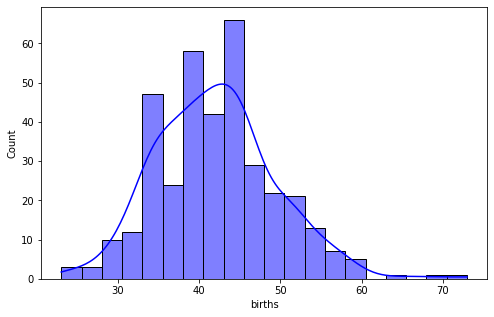

In [9]:
# setting the dimensions of the plot
plt.figure(figsize=(8,5))

sns.histplot(data = f_birth, x = "births", kde = True, color = "blue")

* The above distribution is skewed to the right  
* There are some outliers towards the right

<AxesSubplot:xlabel='date'>

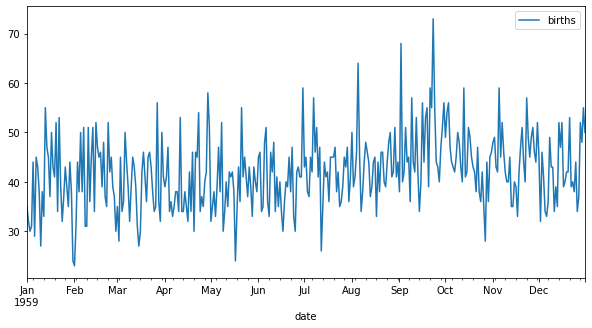

In [10]:
# Plot of the trend
f_birth.plot(figsize=(10,5))

This is a stationary trend; constant mean and constant standard deviation

## Use rolling on the data

In [11]:
f_birth.describe().T

count       mean       std   min   25%   50%   75%   max
births  365.0  41.980822  7.348257  23.0  37.0  42.0  46.0  73.0

In [12]:
# Calculating 20 days rolling mean of births
f_birth_mean = f_birth.rolling(window = 20).mean()

<AxesSubplot:xlabel='date'>

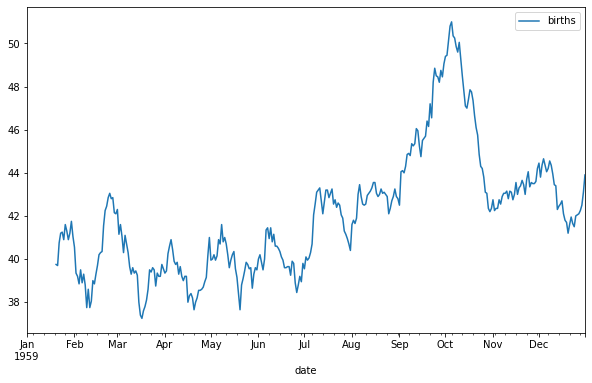

In [13]:
f_birth_mean.plot(figsize=(10,6))

If we exclude October, there is very little trend in the # of births.

<AxesSubplot:xlabel='date'>

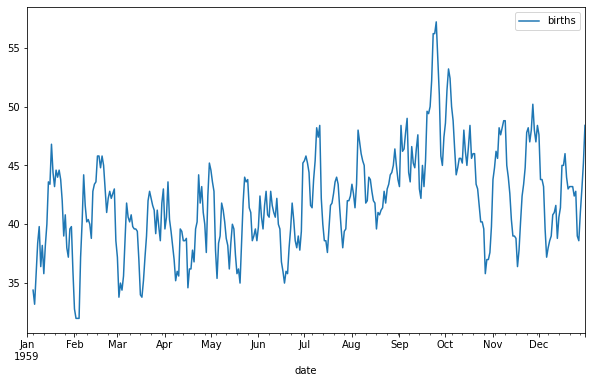

In [14]:
# Calculating 5 days rolling mean of births
f_birth_mean = f_birth.rolling(window = 5).mean()
f_birth_mean.plot(figsize=(10,6))

* Rolling window of 5 days also shows very little trend in the # of births.  
* Rolling average (moving average) technique is used to reduce the noise (irregular pattern) in the data.

## Prediction using baseline model

**Time series models**  
* 1. Baseline model (Naive model)  
  -- True reflection of the historical data  
  -- Recent history is the best reflector of the future  
* 2. Exponential model  
* 3. Autoregressive model  
* 4. Moving average model  
* 5. ARIMA model  
* 6. SARIMA model  
  -- For seasonality data  
* 7. SARIMAX model

**Baseline model (Naive model)**
* Use shift operation on the data

In [15]:
f_birth.head(3)

births
date              
1959-01-01      35
1959-01-02      32
1959-01-03      30

In [16]:
# Performing shift operation
forecast = f_birth.shift(1)

In [17]:
# Concatinating f_birth & forecast dataframes
birth_df = pd.concat([f_birth,forecast], axis = 1)
birth_df

births  births
date                      
1959-01-01      35     NaN
1959-01-02      32    35.0
1959-01-03      30    32.0
1959-01-04      31    30.0
1959-01-05      44    31.0
...            ...     ...
1959-12-27      37    34.0
1959-12-28      52    37.0
1959-12-29      48    52.0
1959-12-30      55    48.0
1959-12-31      50    55.0

[365 rows x 2 columns]

In [18]:
# Renaming the columns
birth_df.columns = ['actual_birth','forecast_birth']
birth_df.head()

actual_birth  forecast_birth
date                                    
1959-01-01            35             NaN
1959-01-02            32            35.0
1959-01-03            30            32.0
1959-01-04            31            30.0
1959-01-05            44            31.0

## Evaluate the accuracy of our baseline model

**Two ways to compute the accuracy / error**  
* 1. We can do it on complete dataset  
* 2. Train, test, split (sklearn)  

Our dataset is small so we can use the complete dataset for evaluation instead of train, test, split method  
We will compute mean square error (MSE) using sklearn

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
# We have a missing value at [0] index so will start from [1] index
mean_squared_error(y_pred = birth_df['forecast_birth'][1:], y_true = birth_df['actual_birth'][1:])

84.22252747252747

In [21]:
# I am showing here that switching the order of y_pred and y_true doesn't make any difference
mean_squared_error(y_true = birth_df['actual_birth'][1:], y_pred = birth_df['forecast_birth'][1:])

84.22252747252747

In [22]:
# Computing RMSE (root mean square error)
np.sqrt(mean_squared_error(y_pred = birth_df['forecast_birth'][1:], y_true = birth_df['actual_birth'][1:]))

9.177283229394606

* We have an error (RMSE) of about +/- 9 in our prediction  
* If we have high outliers in our data, this error will increase so we should deal with high outlier data  
* We do have higher outliers (> 60 births) in our data and addressing these outliers would decrease our RSME

## ARIMA

**AR + I + MA**  
AR: Autoregressive model ---> P  
I: Integrating (differencing) ---> d  
MA: Moving average ---> q  

`ARIMA ---> (p, d, q)`  

-- `PACF` (Partial Autocorrelation Function / Factor) to compute `p`  
-- `Differencing` to compute `d` parameter  
-- `ACF` (Autocorrelation Function / Factor) to compute `d`  

**Auto ARIMA**  
* Auto ML model of ARIMA  
* Automated version of ARIMA  
* We do not have to set p, d, q values manually; Auto ARIMA model will consider it in an automated way  

## ACF
## MA Model
Autocorrelation Function / Factor  

**ACF order of 1**  

Datapoints:  
x1 - 100  
x2 - 110  
x3 - 120  
x4 - 130  
x5 - 140  

The meaning of `ACF order of 1` is:  
110 is related to 100  
120 is related to 110  
130 is related to 120  
140 is related to 130  

x1 = lambda * x2 + some error (residue) ---> any of the equation has this format, it means there is some correlation / dependency in data

**ACF order of 2**  

Datapoints:  
x1 - 100  
x2 - 110  
x3 - 120  
x4 - 130  
x5 - 140  

The meaning of `ACF order of 2` is:  
120 is related to 100  
130 is related to 110  
140 is related to 120  

There is some correlation in the data.  

In time series there is some trend between some current data and previous data.  

current observation  
previous observation  

After how many rows this relationship starts to fail between the current and previous observations. The q will tell this info (After how many rows this relationship starts to fail).  

Q gives us an idea of after how many rows this relationship is no more significant. Or we can say after how many rows we can minimize this effect of correlation.

between 100 - 110 --> correlation of 0.8  
between 100 - 120 --> correlation of 0.6  
between 100 - 105 --> correlation of 0.2  

Our correlation starts decreasing; in such case we can choose value of ACF (q) = 3  

Autocorrelation plot --> x-axis -- lag index, y-axis -- correlation  

In ACF by default optimum value of boundry is 0.1, ACF < 0.1 is a good value  

## PACF
## AR Model

When there is a correlation, we have to deal with it. We have to move this correlation in the time series data.

PACF (Partial Autocorrelation Function / Factor) will give value of p parameter  

100  
110  
120  
125  

100 correlated --> 110 correlated --> 120 correlated --> 105 ===> Autocorrelati1n  

100 correlated --> 110  
100 correlated --> 120  
100 correlated --> 105  
-- indirect correlation / partial correlation  
-- each and every data is correlated with eachother and we need to minimize effect of this type of partial correlation in this time series data.

**Main goal of ACF and PACF ---> minimize correlation in data**  